In [99]:
import numpy as np
from helpers import *
from implementations import *
from data_processing import *
from hyperparams import *
from our_progress_run_loop import *
from classification import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
%reload_ext autoreload 

In [3]:
# some functions used below

def get_only_accuracy(y_result, y_te):
    difference = (y_result-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    accuracy = len(good_guess)/(len(good_guess)+len(bad_guess))
    return accuracy

def standardize(x):
    X = np.copy(x)
    means = np.mean(X, axis=0)
    tx_new = X - means * np.ones(np.shape(X))
    std_dev = np.std(tx_new, axis=0)
    X = tx_new / (std_dev * np.ones(np.shape(X)))
    return X, means, std_dev

## Loading/splitting train data

In [71]:
# loading train data
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0 # adapting to our logistic loss function

In [5]:
x = data_replace(input_data)

In [41]:
y_tr, x_tr, y_te, x_te = split_data(yb,x,0.8)

## Case 1

logistic regression


It is immediately noticeable that this method is completely incorrect: the -999 values and others that are too high make the exponential terms overflow 

In [7]:
x1 = np.copy(x)
initial_w = np.ones([P,1])
max_iters = 100
gamma = 0.7
w_opt_1, mse = logistic_regression(yb, x1, initial_w, max_iters, gamma)

/Users/alexei.ermochkine/Downloads/ML1_final/implementations.py:229: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
/Users/alexei.ermochkine/Downloads/ML1_final/implementations.py:246: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/alexei.ermochkine/Downloads/ML1_final/implementations.py:246: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )


## Case 2 
logistic regression + normalized


In [22]:
x2 = np.copy(x_tr)

x2, means2, std_dev2 = standardize(x2)

initial_w = np.zeros([P,1])
max_iters = 100
gamma = 0.7
w_opt_2, mse = logistic_regression(y_tr, x2, initial_w, max_iters, gamma)

In [23]:
tx_new = np.copy(x_te)
mean_te_2 = np.mean(tx_new)
std_te_2 = np.std(tx_new)
tx_new = tx_new - mean_te_2
x_te_2 = tx_new / std_te_2  

temporary = sigmoid(x_te_2@w_opt_2)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
accuracy2 = get_only_accuracy(y_result, y_te)

In [24]:
accuracy2

0.45622

## Case 3

logistic regression + normalized + w0


In [25]:
x3 = np.copy(x_tr)
x3, means3, std_dev3 = standardize(x3)
x3 = add_w0(x3,x3.shape[0])

initial_w = np.zeros([P+1,1])
max_iters = 100
gamma = 0.7
w_opt_3, mse = logistic_regression(y_tr, x3, initial_w, max_iters, gamma)

In [26]:
tx_new = x_te - means3
x_te_3 = tx_new / std_dev3  
x_te_3 = add_w0(x_te, x_te_3.shape[0])

temporary = sigmoid(x_te_3@w_opt_3)

y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
accuracy3 = get_only_accuracy(y_result, y_te)

In [27]:
accuracy3

0.5257

## Case 4

logistic regression + normalized smart + w0


In [105]:
x4 = np.copy(x_tr)
indices_min_max =[3,11,12,22,26]
indices_gaussian =[0,1,6,8,13,14,16,17,24,27]
indices_angles = [15,18,20,25,28]
indices_gaussian_log = [2,5,7,9,10,19]
normalize(x4, indices_gaussian_log, indices_angles, indices_gaussian, indices_min_max)
x4= add_w0(x4,x4.shape[0])

initial_w = np.zeros([P+1,1])
max_iters = 100
gamma = 0.7
w_opt_4, mse = logistic_regression(y_tr, x4, initial_w, max_iters, gamma)

In [43]:
x_te_4 = np.copy(x_te)
normalize(x_te_4, indices_gaussian_log, indices_angles, indices_gaussian, indices_min_max)
x_te_4 = add_w0(x_te_4,x_te_4.shape[0])

temporary = sigmoid(x_te_4@w_opt_4)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
accuracy4 = get_only_accuracy(y_result, y_te)

In [44]:
accuracy4

0.65552

## Case 5
logistic regression + normalized smart + w0 + high correlation features removed

In [96]:
x5 = np.copy(x_tr)
indices_min_max =[3,11,12,22,26]
indices_gaussian =[0,1,6,8,13,14,16,17,24,27]
indices_angles = [15,18,20,25,28]
indices_gaussian_log = [2,5,7,9,10,19]
normalize(x5, indices_gaussian_log, indices_angles, indices_gaussian, indices_min_max)
x5 = np.delete(x5,29,1)
x5 = np.delete(x5,23,1)
x5 = np.delete(x5,21,1)
x5 = np.delete(x5,4,1)
x5= add_w0(x5, x5.shape[0])

initial_w = np.zeros([P-3,1])
max_iters = 100
gamma = 0.7
w_opt_5, mse = logistic_regression(y_tr, x5, initial_w, max_iters, gamma)


In [97]:
x_te_5 = np.copy(x_te)
normalize(x_te_5, indices_gaussian_log, indices_angles, indices_gaussian, indices_min_max)
x_te_5 = np.delete(x_te_5,29,1)
x_te_5 = np.delete(x_te_5,23,1)
x_te_5 = np.delete(x_te_5,21,1)
x_te_5 = np.delete(x_te_5,4,1)
x_te_5= add_w0(x_te_5,x_te_5.shape[0])

temporary = sigmoid(x_te_5@w_opt_5)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
accuracy5 = get_only_accuracy(y_result, y_te)

In [98]:
accuracy5

0.74578

## Box plots for each case 
(depending on the randomness of split_data)

In [108]:
M = 10
accuracy = np.zeros((M,4))
for i in range(M):
    accuracy[i,0], accuracy[i,1], accuracy[i,2], accuracy[i,3] = loop(yb,x,0.8,P)

/Users/alexei.ermochkine/Downloads/ML1_final/implementations.py:229: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
/Users/alexei.ermochkine/Downloads/ML1_final/implementations.py:246: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/alexei.ermochkine/Downloads/ML1_final/implementations.py:246: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )


In [109]:
print('means for each case: ', np.mean(accuracy,axis=0))
print('median for each case: ',np.median(accuracy,axis=0))
print('std deviation for each case: ',np.std(accuracy,axis=0))

means for each case:  [0.457588 0.521346 0.596628 0.746016]
median for each case:  [0.45868 0.51901 0.65368 0.7464 ]
std deviation for each case:  [0.00611008 0.00839424 0.09651229 0.00147523]


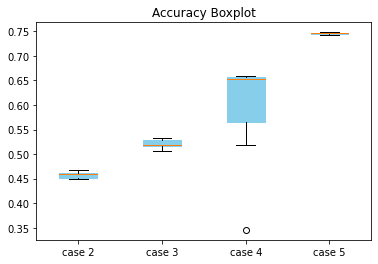

<Figure size 432x288 with 0 Axes>

In [110]:
fig = plt.figure(1)
bp = plt.boxplot(accuracy, vert=True, patch_artist = True)
for patch in bp['boxes']:
 patch.set_color('skyblue')
plt.gca().xaxis.set_ticklabels(['case 2', 'case 3', 'case 4','case 5'])
plt.title('Accuracy Boxplot')
plt.show()
plt.savefig('Boxplot functions')